[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/bads/blob/master/exercises/2_ex_descriptive_analytics.ipynb) 

# BADS Exercise 2 on the foundations of descriptive analytics
The second exercise comprises one more task to advance your skills in Python programming. It's main focus is on cluster analysis.

## 1. Further exercises on Python programming
The following exercise tasks revisit some concepts covered in [Tutorial 1 on Python programming](https://github.com/Humboldt-WI/bads/blob/master/tutorials/1_nb_python_intro.ipynb) 

### Using inbuilt functions and libraries
In Python and other programming language, we use inbuilt functions all the time. Libraries like `NumPy` and `Pandas`, which offer a ton of functionality for handling and analyzing data, are the main reason why the Python language is such a good fit for data science. Let's practice our ability to access libraries and use their functions with some concrete tasks.

The density of the normal distribution with mean $\mu$ and variance $\sigma$ is given as
$$f(x | \mu ,\sigma ^{2}) = {\frac {1}{\sqrt {2\sigma ^{2}\pi}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

Let's create a nice plot of the bell curve that is so famous and characteristic for the normal distribution. Below, we already made sure that relevant libraries are imported. First, define two variables that store the two parameters of the normal distribution; no need to spill out these parameters, right? Next generate some values $x$. Say you want to plot the bell curve for $x \in \{-3, 3\} $. Use the `NumPy` function `linespace()` for this purpose. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
sigma = 1
x = np.linspace(-3,3, num = 500)



In [16]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

Then, for each value of $x$, compute the probability that a normally distributed random variable would be arbitrarily close to that value. To calculate the probability density of the normal distribution, you can use the function `norm.pdf`. The function is part of the *stats models library*, which we import below. So you can write something like `stats.norm.pdf(...)` where ... stands for the arguments that the function requires. Make sure to store the results of the computation in a variable **nvValues**.

In [24]:
nvValues = stats.norm.pdf(x, mu, sigma)

We are now ready to plot. Create a simple graph of **nvValues** against **x** using the `plot()`function. Let's say you want your line to be in red color. Use the help and web search to find out how to plot a red line. Also make sure to label your axes; remember: never create a plot without axis labels.

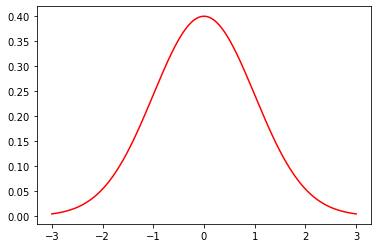

In [31]:
plt.plot(x, nvValues, color = "red")

## 2. Exercises on descriptive analytics
The following exercise tasks revisit some concepts covered in [Tutorial 2 on descriptive analytics](https://github.com/Humboldt-WI/bads/blob/master/tutorials/2_nb_descriptive_analytics.ipynb). 

### 2.1 Data generation
We want to revisit kMeans and need some data for this purpose. Make use of the function `make_blobs()`, which is part of the `sklearn` library to generate some artificial data. Say we want to **create data with 4 clusters**. Make sure to configure the `make_blobs()` function appropriately. 

In [46]:
# Generate data for clustering
from sklearn.datasets import make_blobs
mu = [[1,1],[3,3],[-1,-1],[-3,-3]]
sigma = 2
X, y = make_blobs(n_samples = 200*4, centers = mu, cluster_std = sigma)
X.shape, y.shape

((800, 2), (800,))

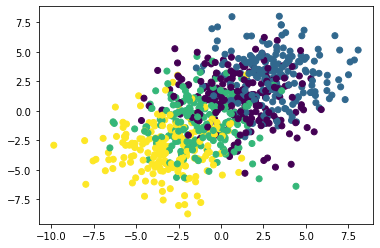

In [48]:
plt.scatter(X[:,0],X[:,1], c=y);

## 2.2 kMeans
The second tutorial provided a *from scratch implementation* of the kMeans algorithm. Go back to the tutorial and copy/paste the relevant parts of the code into this notebook. This will allow you to run the algorithm here.

In [90]:
# From-scratch implementation of kMeans 
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4, init = 'random')
res = km.fit_predict(X)
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random', ndarray, callable}, default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for 

Test the implementation by clustering the data created in 2.1 above. We know the data has 4 clusters, so feel free to set $k=4$. 

0.05125

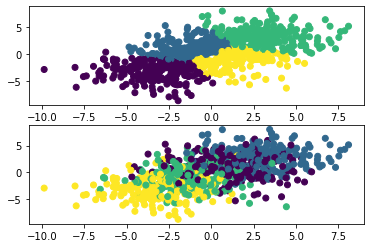

In [80]:
# Clustering of the artificial data
plt.subplot(2,1,1)
plt.scatter(X[:,0], X[:,1], c = res)
plt.subplot(2,1,2)
plt.scatter(X[:,0], X[:,1], c = y)
np.sum(y == res)/800

In [97]:
help(np.isclose)

Help on function isclose in module numpy:

isclose(a, b, rtol=1e-05, atol=1e-08, equal_nan=False)
    Returns a boolean array where two arrays are element-wise equal within a
    tolerance.
    
    The tolerance values are positive, typically very small numbers.  The
    relative difference (`rtol` * abs(`b`)) and the absolute difference
    `atol` are added together to compare against the absolute difference
    between `a` and `b`.
    
    .. warning:: The default `atol` is not appropriate for comparing numbers
                 that are much smaller than one (see Notes).
    
    Parameters
    ----------
    a, b : array_like
        Input arrays to compare.
    rtol : float
        The relative tolerance parameter (see Notes).
    atol : float
        The absolute tolerance parameter (see Notes).
    equal_nan : bool
        Whether to compare NaN's as equal.  If True, NaN's in `a` will be
        considered equal to NaN's in `b` in the output array.
    
    Returns
    -------


## 2.3 Distance function
In the lecture, we argued that clustering methods and kMeans are versatile in that the support various distance measures. Let's convince ourself that this is true. Your task is to write a custom function that calculates **cosine similarity**. You can look up the formula of the cosine similarity in the lecture slides of chapter 2, or from the Internet. 

In [89]:
def cosine_similarity(x,y):
    return np.inner(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

0.9626891788764173

In [105]:
def label_cluster(n_samples, clusters):
    """each sample will get the label of the cluster it was assigned to"""
    labels = np.empty(n_samples) # creates empty array as long as samples for future labels

    for cluster_idx, cluster in enumerate(clusters):
        for sample_index in cluster:
            labels[sample_index] = cluster_idx # assign labels to each sample
    return labels

def create_clusters(K, X, centroids):
    """Assign the samples to the closest centroids to create clusters"""
    clusters = [[] for _ in range(K)] # creates a list of K number of lists
    for idx, sample in enumerate(X):
        centroid_idx = find_closest_centroid(sample, centroids) # find closest centroid for each sample
        clusters[centroid_idx].append(idx) # create index list of closest centroids
    return clusters

def find_closest_centroid(sample, centroids):
    """Distance from each sample to every centroid"""
    distances = [cosine_similarity(sample, point) for point in centroids] # calculate distance from each sample to each centroid
    closest_index = np.argmin(distances) # take closest centroid (one with minimal distance)
    return closest_index

def update_centroids(X, K, n_features, clusters):
    """Assign mean value of cluster features to each centroid"""
    centroids = np.zeros((K, n_features))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(X[cluster,:], axis=0) # find new centroid by finding mean of all points assigned to centroid
        centroids[cluster_idx] = cluster_mean # collect all centroids
    return centroids

def is_converged(centroids_old, centroids, K, conv):
    """Check if centroids have changed since last iteration"""
    distances = [cosine_similarity(centroids_old[i], centroids[i]) for i in range(K)] # check distance between old and new centroids
    return sum(distances) < conv # return Boolean indicating whether centroids are the same as before or not

def KMeans_from_scratch(X, K=5, max_iters=100, conv = 0.1):
    """Choose a random set of centroids then optimise using above functions"""
    n_samples, n_features = X.shape
    
    # Initialization 
    random_sample_idx = np.random.choice(n_samples, K, replace=False) # take random sample points to be initial clusters
    centroids = [X[idx] for idx in random_sample_idx] # label these points as centroids

    iteration_num = 0 # initialize iteration tracker

    # Optimization
    for iteration in range(max_iters):
        
        iteration_num += 1 # track iterations required

        clusters = create_clusters(K, X, centroids) # assignment to closest centroids (cluster creation)

        centroids_old = centroids # archive previous centroids
        centroids = update_centroids(X, K, n_features, clusters) # Updating centroids 
        
        # Convergence Confirmation
        if is_converged(centroids_old, centroids, K, conv): # check if last iteration's centroids were the same as current iteration
            labels = label_cluster(n_samples, clusters)
            dist = [cosine_similarity(X[row_num], centroids[int(labels[row_num])]) for row_num in range(X.shape[0])] # get distance from each point to its centroid
            total_dist = np.sum(np.square(dist)) # total distance calculated as sum of squares
            break # exit loop since there was no change since last iteration

    # Classify samples as the index of their clusters
    return labels, iteration_num, K, centroids, total_dist

Next thing to do is to change the above from scratch implementation of the kMeans algorithm such that it uses your cosine similarity function for clustering the data. It might be better to copy/past the full kMeans code one more time because this will allow you to have both versions, with Euclidean distance and cosine similarity, in the notebook. This makes it easier to re-run the clustering in case you need or want to.

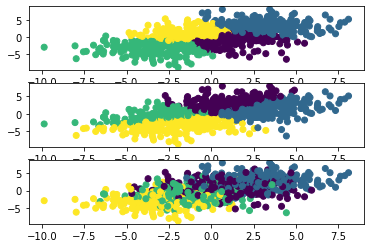

In [142]:
# kMeans with cosine similarity
test = KMeans_from_scratch(X, 4, 100, conv = 0.01)
plt.subplot(3,1,1)
plt.scatter(X[:,0], X[:,1], c = res)
plt.subplot(3,1,2)
plt.scatter(X[:,0], X[:,1], c = test[0])
plt.subplot(3,1,3)
plt.scatter(X[:,0], X[:,1], c = y)


## 2.4 New clustering solution
The last task on the list is to apply the altered kMeans with cosine similarity to your synthetic data set. Try to come up with a suitable way to compare the results of the two versions of kMeans. It is natural to ask how the cluster solutions differ when using Euclidean distance or cosine similarity. How would you answer that question? Make use of your Python skills to come up with an answer.

In [143]:
# Create cluster solution with the modified kMeans
from collections import Counter

# Get index values of where y is 0
index_group_0 = y == 0

# Create simpler array of results so we can correct if necessary
result_corrected = test[0]

# Create array of values from our kMeans results ONLY WHERE y is supposed to be 1
label_0 = result_corrected[index_group_0]

# If we see there are more labels of 1, flip the labels. Remember that ~ reverses Boolean values
if Counter(label_0)[1] > Counter(label_0)[0]:
  result_corrected = (~result_corrected.astype(bool)).astype(int)

In [144]:
# Write some code to compare the two cluster solutions from using Euclidean distance and cosine similarity 
sum(result_corrected == y)/800, sum(res == y)/800

(0.27, 0.38)

## 2.5 Further tasks
Still not enough? Ok, that is great! Here are a few ideas for some more tasks associated with kMeans and the scope of this exercise.
- Write a custom function calculating the city-block or Manhatten metric
- Improve the from scratch implementation of kMeans such that it supports the caller to specify the desired distance function as an argument
- The above changes should enable you to flexibly run kMeans with Euclidean, cosine, and city-block distance. Try that out using your synthetic data
- Use the `sklearn` function `make_classification()` to generate a more challenging data and apply kMeans to it. You can use your customer implementation of kMeans or the one available in `sklearn`
- Run a web-search for the **IRIS data set**. It is a very well known data set. Quickly familiarize yourself with the data. Afterwards, load it using the function `sklearn.datasets.load_iris()`. Check whether kMeans is able to identify the three types of iris flowers. 

# Done... puh, that was a lot of work. And you did it! Congratulations!!! 